# Netflix Movies and TV Shows

In [1]:
!pip install nltk

     |████████████████████████████████| 1.4MB 5.0MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/d2/3d/fa76db83bf75c4f8d338c2fd15c8d33fdd7ad23a9b5e57eb6c5de26b430e/click-7.1.2-py2.py3-none-any.whl
     |████████████████████████████████| 307kB 6.4MB/s eta 0:00:01
     |████████████████████████████████| 665kB 26.2MB/s eta 0:00:01
     |████████████████████████████████| 71kB 18.2MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk


In [2]:
!pip install wordcloud

     |████████████████████████████████| 368kB 5.2MB/s eta 0:00:01


#### Import Libraries

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud

#### Exploring the Dataset

In [4]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [5]:
df.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


#### Check Missing Value in Data

In [7]:
print('Checking missing data : \n{}'.format(df.isnull().any()), '\n')
print('Counting missing data : \n{}'.format(df.isna().sum()), '\n')
print('Finished')

Checking missing data : 
show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
dtype: bool 

Counting missing data : 
show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64 

Finished


In [8]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
director,1969,0.315849
cast,570,0.091434
country,476,0.076355
date_added,11,0.001765
rating,10,0.001604
description,0,0.000000
listed_in,0,0.000000
duration,0,0.000000
release_year,0,0.000000
title,0,0.000000


In [9]:
df['director'].fillna('No Director', inplace=True)
df['cast'].fillna('No Cast', inplace=True)
df['country'].fillna('Country Unavailable', inplace=True)
df.dropna(subset=['date_added','rating'],inplace=True)

In [10]:
df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

### Analyzing and Visualize Data
#### Popular Genre

In [11]:
df['listed_in'].value_counts()

Documentaries                                         299
Stand-Up Comedy                                       273
Dramas, International Movies                          248
Dramas, Independent Movies, International Movies      186
Comedies, Dramas, International Movies                174
                                                     ... 
Anime Features, Music & Musicals, Sci-Fi & Fantasy      1
International Movies, Sports Movies                     1
Crime TV Shows, TV Dramas, TV Sci-Fi & Fantasy          1
British TV Shows, Kids' TV, TV Dramas                   1
Crime TV Shows, Kids' TV                                1
Name: listed_in, Length: 461, dtype: int64

In [12]:
from collections import Counter
genre = df['listed_in']
genre_count = pd.Series(dict(Counter(','.join(genre).replace(' ,',',').replace(', ',',')
                                       .split(',')))).sort_values(ascending=False)

genre_count

International Movies            1927
Dramas                          1622
Comedies                        1113
International TV Shows           999
Documentaries                    668
TV Dramas                        598
Action & Adventure               597
Independent Movies               552
TV Comedies                      428
Thrillers                        392
Children & Family Movies         378
Romantic Movies                  376
Crime TV Shows                   362
Kids' TV                         325
Stand-Up Comedy                  281
Docuseries                       278
Romantic TV Shows                278
Horror Movies                    262
Music & Musicals                 243
British TV Shows                 209
Sci-Fi & Fantasy                 193
Sports Movies                    157
Reality TV                       153
Korean TV Shows                  132
TV Action & Adventure            125
Spanish-Language TV Shows        116
Anime Series                     115
C

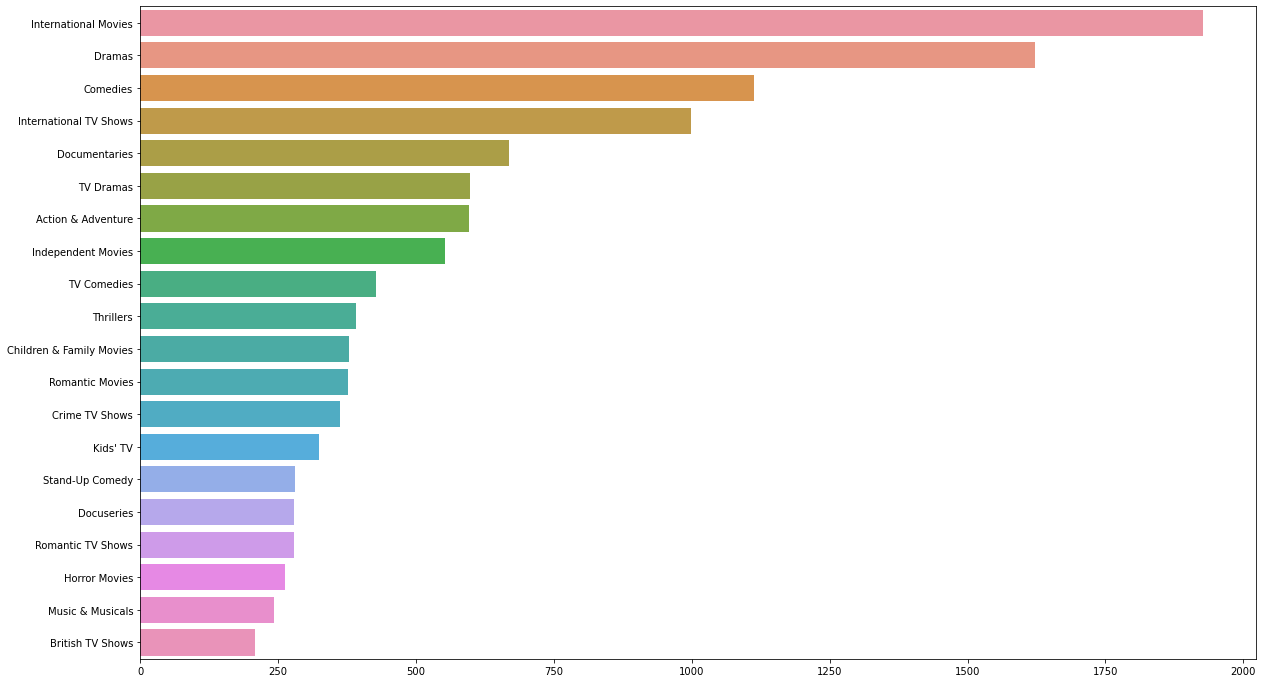

In [13]:
genre_top = genre_count[:20]
plt.figure(figsize=(20,12))
sns.barplot(genre_top, genre_top.index)
plt.show()

#### Movies vs TV Shows

In [14]:
movies = df.loc[df.type == "Movie"]
movies_year_count = df.release_year.value_counts().sort_values().tail(10)
movies_year_count

2011     136
2010     147
2012     182
2013     235
2014     288
2015     510
2016     828
2019     843
2017     957
2018    1062
Name: release_year, dtype: int64

In [15]:
shows = df.loc[df.type == "TV Show"]
shows_year_count = shows.release_year.value_counts().sort_values().tail(10)
shows_year_count

2011     36
2010     37
2012     57
2013     58
2014     75
2015    151
2016    236
2017    277
2018    416
2019    443
Name: release_year, dtype: int64

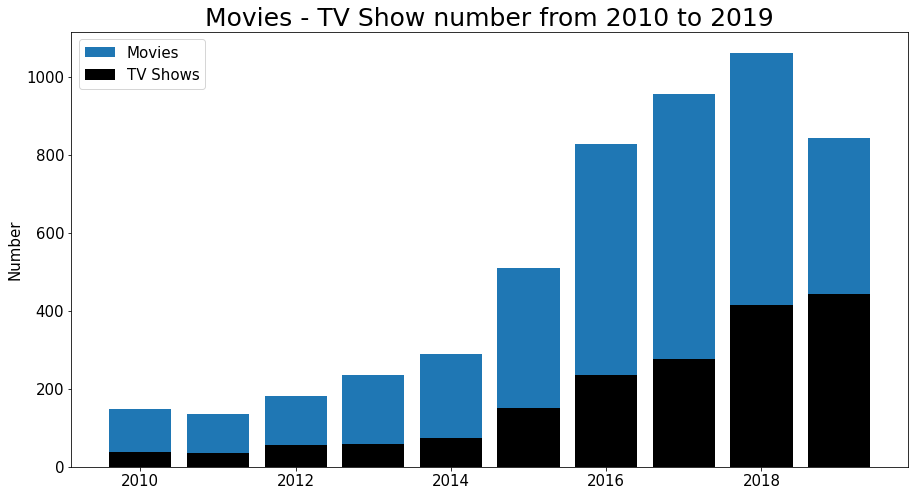

In [16]:
plt.figure(figsize = (15,8))
plt.bar(movies_year_count.index,movies_year_count.values,label = "Movies")
plt.bar(shows_year_count.index,shows_year_count.values,label = "TV Shows",color = "black")
plt.legend(fontsize = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.ylabel("Number",size = 15)
plt.title("Movies - TV Show number from 2010 to 2019",fontdict = {"fontsize":25})
plt.savefig("Movies - TV Show number from 2010 to 2019",dpi = 300)
plt.show()

#### Top Directors

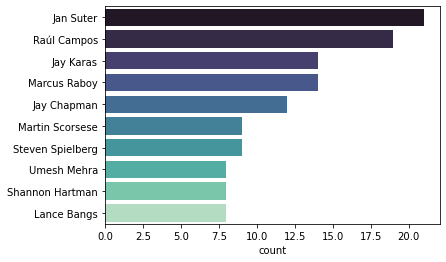

In [17]:
top_directors = df[df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = top_directors, order=top_directors.value_counts().index[:10], palette='mako')
plt.show()

#### Top Actors

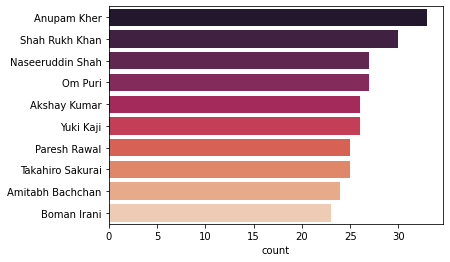

In [18]:
top_cast = df[df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = top_cast, order=top_cast.value_counts().index[:10], palette='rocket')
plt.show()

#### Analysis Duration of Movies

<AxesSubplot:>

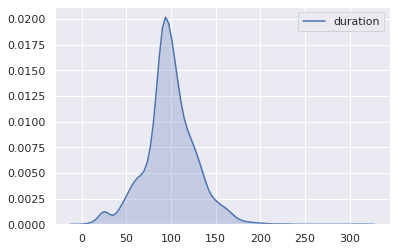

In [19]:
df_movie = df[df.type == 'Movie']
movie = pd.DataFrame({'type': df_movie.type, 'duration': df_movie.duration})

movie['duration']=movie['duration'].str.replace(' min','')
movie['duration']=movie['duration'].astype(str).astype(int)

sns.set(style="darkgrid")
sns.kdeplot(data=movie['duration'], shade=True)

#### Generate a cloud of word in title of TV shows and movies

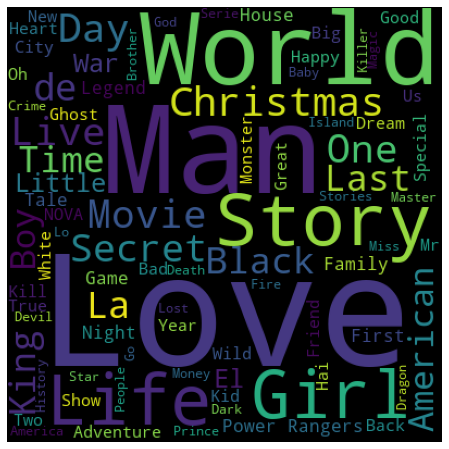

In [20]:
wordcloud = WordCloud(width = 400, height = 400, background_color ='black', 
                min_font_size = 10).generate(" ".join(df.title))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Understanding what content is available in different countries

#### Type from Top 5 Country

In [21]:
typec = df[['type', 'country']]
typec.head()

,type,country
0,Movie,"United States, India, South Korea, China"
1,Movie,United Kingdom
2,TV Show,United States
3,TV Show,United States
4,Movie,United States


In [22]:
# get country list
dummies = typec['country'].str.get_dummies(sep=', ')
OHCountry = pd.concat([typec, dummies],axis=1)
OHCountry.head()

,type,country,Afghanistan,Albania,Argentina,Armenia,Australia,Austria,Azerbaijan,Bangladesh,...,United Kingdom,"United Kingdom,",United States,"United States,",Uruguay,Vatican City,Venezuela,Vietnam,West Germany,Zimbabwe
0,Movie,"United States, India, South Korea, China",0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Movie,United Kingdom,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,TV Show,United States,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,TV Show,United States,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Movie,United States,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [23]:
# count country with most shows
drop_type = OHCountry.drop('type', axis=1)
Countrycnt = drop_type.drop('country',axis=1).sum()
Countrycnt

Afghanistan       1
Albania           1
Argentina        68
Armenia           1
Australia       124
               ... 
Vatican City      1
Venezuela         3
Vietnam           4
West Germany      5
Zimbabwe          2
Length: 114, dtype: int64

In [24]:
Countrycnt.nlargest(5)

United States          2600
India                   838
United Kingdom          600
Country Unavailable     471
Canada                  318
dtype: int64

In [25]:
countrytemp = Countrycnt.index.tolist()

In [26]:
countryList = []
for i in countrytemp:
    if i in Countrycnt.nlargest(5):
        countryList.append(i)
countryList

['Canada', 'Country Unavailable', 'India', 'United Kingdom', 'United States']

In [27]:
# get type movies
typemov = typec[typec['type']=='Movie']
typemov.country.fillna(" ", inplace=True)
typemov.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,type,country
0,Movie,"United States, India, South Korea, China"
1,Movie,United Kingdom
4,Movie,United States
6,Movie,"Bulgaria, United States, Spain, Canada"
7,Movie,Chile


In [28]:
# get type TV shows
typeshow = typec[typec['type']=='TV Show']
typeshow.country.fillna(" ", inplace=True)
typeshow.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,type,country
2,TV Show,United States
3,TV Show,United States
5,TV Show,Spain
8,TV Show,United States
26,TV Show,Country Unavailable


In [29]:
# get list of type from each country
def countType(countryList, typemov):
    TypeMov = []
    for i in range(len(countryList)):
        temp = 0
        slctCountry = countryList[i]
        for j in typemov['country']:
            if (slctCountry in j):
                temp += 1
        TypeMov.append(temp)
    return TypeMov
MovData = countType(countryList, typemov)
TVData = countType(countryList, typeshow)

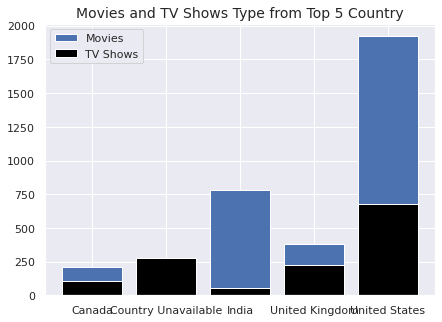

In [30]:
# plot graph Movie Type
plt.figure(figsize=(7,5))
plt.bar(countryList, MovData, label = "Movies")
plt.bar(countryList, TVData, label = "TV Shows",color = "black")
plt.legend()
plt.title("Movies and TV Shows Type from Top 5 Country",fontdict = {"fontsize":14})
plt.show()

In [31]:
# genre_count <- list of genre
genrec = df[['listed_in', 'country']]
genrec.head()

,listed_in,country
0,"Children & Family Movies, Comedies","United States, India, South Korea, China"
1,Stand-Up Comedy,United Kingdom
2,Kids' TV,United States
3,Kids' TV,United States
4,Comedies,United States


In [32]:
separateCountry = genrec.country.str.split(', ', expand=True)

In [33]:
separateCountry

,0,1,2,3,4,5,6,7,8,9,10,11
0,United States,India,South Korea,China,None,None,None,None,None,None,None,None
1,United Kingdom,None,None,None,None,None,None,None,None,None,None,None
2,United States,None,None,None,None,None,None,None,None,None,None,None
3,United States,None,None,None,None,None,None,None,None,None,None,None
4,United States,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
6218,Cyprus,Austria,Thailand,None,None,None,None,None,None,None,None,None
6219,Japan,None,None,None,None,None,None,None,None,None,None,None
6220,Canada,None,None,None,None,None,None,None,None,None,None,None
6221,Japan,None,None,None,None,None,None,None,None,None,None,None


### Identifying similar content by matching text-based features

In [34]:
data = df[['title', 'director', 'listed_in', 'description']]
data.head()

,title,director,listed_in,description
0,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Jandino: Whatever it Takes,No Director,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,Transformers Prime,No Director,Kids' TV,"With the help of three human allies, the Autob..."
3,Transformers: Robots in Disguise,No Director,Kids' TV,When a prison ship crash unleashes hundreds of...
4,#realityhigh,Fernando Lebrija,Comedies,When nerdy high schooler Dani finally attracts...


In [35]:
# check for missing values
print('Missing value for each data : {}\n'.format(data.isna().sum()))
print('Missing value from Director : {}'.format(data.director.isna().sum()), '\n')
print('Finished Checking')

Missing value for each data : title          0
director       0
listed_in      0
description    0
dtype: int64

Missing value from Director : 0 

Finished Checking


In [36]:
# combine feature data to get movie info
data['movie_info'] = data['director'] + ' ' + data['listed_in'] + ' ' + data['description']
data.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,title,director,listed_in,description,movie_info
0,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,"Richard Finn, Tim Maltby Children & Family Mov..."
1,Jandino: Whatever it Takes,No Director,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,No Director Stand-Up Comedy Jandino Asporaat r...
2,Transformers Prime,No Director,Kids' TV,"With the help of three human allies, the Autob...",No Director Kids' TV With the help of three hu...
3,Transformers: Robots in Disguise,No Director,Kids' TV,When a prison ship crash unleashes hundreds of...,No Director Kids' TV When a prison ship crash ...
4,#realityhigh,Fernando Lebrija,Comedies,When nerdy high schooler Dani finally attracts...,Fernando Lebrija Comedies When nerdy high scho...


In [37]:
# check len for movie info
print('Length of Movie info : {}'.format(len(data.movie_info[0])))
# check for 1 data from movie info
print('Data checked : {}\n'.format(data.movie_info[0]))

Length of Movie info : 200
Data checked : Richard Finn, Tim Maltby Children & Family Movies, Comedies Before planning an awesome wedding for his grandfather, a polar bear king must take back a stolen artifact from an evil archaeologist first.



In [38]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
stopword

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyterlab/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [39]:
import string
punctuation = list(string.punctuation)
punctuation

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [40]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/jupyterlab/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [41]:
# get lemma from movie info and lower the character
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    final_text = []
    for i in text.split():
         if i.strip().lower() not in stopword:
                word = lemmatizer.lemmatize(i.strip())
                final_text.append(word.lower())                
    return  " ".join(final_text)      

In [ ]:
data.movie_info = data.movie_info.apply(lemmatize_words)

In [ ]:
# check data that has been lemmatize
data.movie_info[0]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tf=CountVectorizer()
X=tf.fit_transform(data['movie_info'])
cosine_sim = cosine_similarity(X)

In [ ]:
search_movie = input('Please enter movie name : ',)

In [ ]:
index_l = data[data['title'] == search_movie].index.values[0]
similar_movies = list(enumerate(cosine_sim[index_l]))
sort_movies = sorted(similar_movies , key = lambda X:X[1] , reverse = True)
sort_movies.pop(0)
sort_movies = sort_movies[:10]

In [ ]:
sort_movies

In [ ]:
# get movies name from cosine similarity measurement

for movies in sort_movies:
    print(data.title[movies[0]])